In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import csv
from pandas import DataFrame,date_range
import matplotlib.dates as mdates

In [104]:
SCK1 = pd.read_csv('SCK1_Mar4officetests.csv')
SCK2 = pd.read_csv('SCK2_Mar4officetests.csv')
SCK3 = pd.read_csv('SCK3_Mar4officetests.csv')

In [105]:
print SCK1.shape
print SCK2.shape
print SCK3.shape

(8945, 9)
(2464, 9)
(7133, 9)


In [106]:
# start and end of all in the same format with adjusted dates and times
def status(array):
    print 'Start =',min(array),'  End =',max(array),'  Length =', len(array)

In [129]:
# finding matching starting time indecies
status(SCK1[' UTC'][1868:])
status(SCK2[' UTC'][7:250])
status(SCK3[' UTC'][5:])

Start = 2016-03-00 11:39:14   End = 2016-03-00 13:06:22   Length = 5209
Start = 2016-03-00 11:06:04   End = 2016-03-00 12:58:23   Length = 243
Start = 2016-03-00 11:08:06   End = 2016-03-00 13:07:39   Length = 7123


In [114]:
# SCK2_adj = []
# SCK2_adj = np.append(SCK2[2270:], SCK2_adj)
# SCK2_adj = np.append(SCK2[1129:2184], SCK2_adj)
# SCK2_adj = np.append(SCK2[7:1120], SCK2_adj)
# print SCK2_adj

In [130]:
SCK1 = SCK1[1868:]
SCK2 = SCK2[7:250]
SCK3 = SCK3[5:]

In [131]:
# Fixing the SCK times
# string manipulation - replacing all the day 00's with 02's in SCK time

# the SCK time doesn't have any garbage
sck1_time = pd.to_datetime(SCK1[' UTC'])
sck2_time = pd.to_datetime(SCK2[' UTC'])
sck3_time = pd.to_datetime(SCK3[' UTC'])

# making numpy arrays
stime1 = np.array(sck1_time)
stime2 = np.array(sck2_time)
stime3 = np.array(sck3_time)

new1 = []
for i in range(len(stime1)):
    w = list(stime1[i])
    w[9] = '2'
    new1 = np.append(''.join(w),new1)
shms1 = new1[::-1] # needs to be flipped

new2 = []
for i in range(len(stime2)):
    w = list(stime2[i])
    w[9] = '2'
    new2 = np.append(''.join(w),new2)
shms2 = new2[::-1] # needs to be flipped

new3 = []
for i in range(len(stime3)):
    w = list(stime3[i])
    w[9] = '2'
    new3 = np.append(''.join(w),new3)
shms3 = new3[::-1] # needs to be flipped

In [132]:
SCK1time = shms1
SCK1x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in SCK1time]
SCK2time = shms2
SCK2x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in SCK2time] # not used in plotting, time adj needed
SCK3time = shms3
SCK3x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in SCK3time] # not used in plotting, time adj needed
xfmt = mdates.DateFormatter('%H:%M')

In [133]:
# Time adjust to make them match almost exactly on the second to the computer

SCK1new = []
for i in range(0,len(SCK1time)):
    ddt = datetime.datetime.strptime(SCK1time[i],"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=0)
    SCK1new = np.append(adj,SCK1new)
SCK1new = SCK1new[::-1]

SCK2new = []
for i in range(0,len(SCK2time)):
    ddt = datetime.datetime.strptime(SCK2time[i],"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=-12)
    SCK2new = np.append(adj,SCK2new)
SCK2new = SCK2new[::-1]

SCK3new = []
for i in range(0,len(SCK3time)):
    ddt = datetime.datetime.strptime(SCK3time[i],"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=0)
    SCK3new = np.append(adj,SCK3new)
SCK3new = SCK3new[::-1]

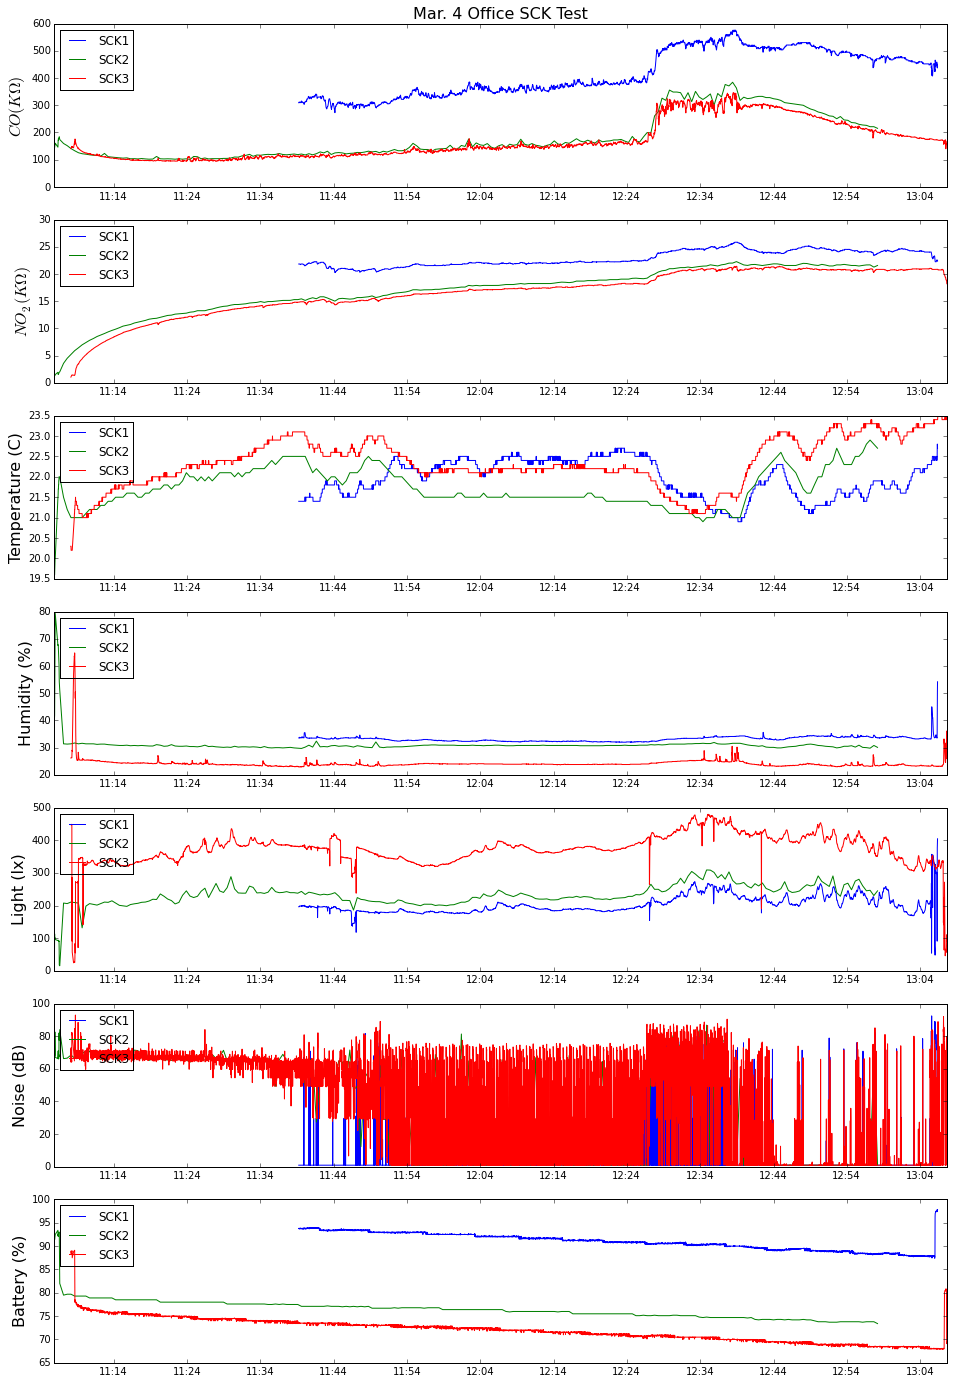

In [136]:
fig = plt.figure(figsize=(16,24))
ax1 = fig.add_subplot(711)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax1.plot(SCK1new,SCK1[' Carbon Monxide ( kOhm) '],label='SCK1')
ax1.plot(SCK2new,SCK2[' Carbon Monxide ( kOhm) '],label='SCK2')
ax1.plot(SCK3new[3:],SCK3[' Carbon Monxide ( kOhm) '][3:],label='SCK3') # take out first 3 rows: error
ax1.set_ylabel('$CO (K\Omega)$', fontsize=16)
ax1.set_title('Mar. 4 Office SCK Test', fontsize=16)
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(712)
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax2.plot(SCK1new,SCK1[' Nitrogen Dioxide ( kOhm) '],label='SCK1')
ax2.plot(SCK2new,SCK2[' Nitrogen Dioxide ( kOhm) '],label='SCK2')
ax2.plot(SCK3new[3:],SCK3[' Nitrogen Dioxide ( kOhm) '][3:],label='SCK3') # take out first 3 rows: error
ax2.set_ylabel('$NO_2 (K\Omega)$', fontsize=16)
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(713)
ax3.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax3.plot(SCK1new,SCK1['Temperature ( C) '],label='SCK1')
ax3.plot(SCK2new,SCK2['Temperature ( C) '],label='SCK2')
ax3.plot(SCK3new[3:],SCK3['Temperature ( C) '][3:],label='SCK3') # take out first 3 rows: error
ax3.set_ylabel('Temperature (C)', fontsize=16)
ax3.legend(loc='upper left')

ax4 = fig.add_subplot(714)
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax4.plot(SCK1new,SCK1[' Humidity ( %) '],label='SCK1')
ax4.plot(SCK2new,SCK2[' Humidity ( %) '],label='SCK2')
ax4.plot(SCK3new[3:],SCK3[' Humidity ( %) '][3:],label='SCK3') # take out first 3 rows: error
ax4.set_ylabel('Humidity (%)', fontsize=16)
ax4.legend(loc='upper left')

ax5 = fig.add_subplot(715)
ax5.xaxis.set_major_formatter(xfmt)
ax5.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax5.plot(SCK1new,SCK1[' Light ( lx) '],label='SCK1')
ax5.plot(SCK2new,SCK2[' Light ( lx) '],label='SCK2')
ax5.plot(SCK3new[3:],SCK3[' Light ( lx) '][3:],label='SCK3') # take out first 3 rows: error
ax5.set_ylabel('Light (lx)', fontsize=16)
ax5.legend(loc='upper left')

ax6 = fig.add_subplot(716)
ax6.xaxis.set_major_formatter(xfmt)
ax6.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax6.plot(SCK1new,SCK1[' Noise ( dB) '],label='SCK1')
ax6.plot(SCK2new,SCK2[' Noise ( dB) '],label='SCK2')
ax6.plot(SCK3new[3:],SCK3[' Noise ( dB) '][3:],label='SCK3') # take out first 3 rows: error
ax6.set_ylabel('Noise (dB)', fontsize=16)
ax6.legend(loc='upper left')

ax7 = fig.add_subplot(717)
ax7.xaxis.set_major_formatter(xfmt)
ax7.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax7.plot(SCK1new,SCK1[' Battery ( %) '],label='SCK1')
ax7.plot(SCK2new,SCK2[' Battery ( %) '],label='SCK2')
ax7.plot(SCK3new[3:],SCK3[' Battery ( %) '][3:],label='SCK3') # take out first 3 rows: error
ax7.set_ylabel('Battery (%)', fontsize=16)
ax7.legend(loc='upper left')

#plt.savefig('SCK_Mar4test.eps', format='eps', dpi=1200)

# slice from like 11:50 to 12:25 I was outside due to a bomb threat. 
# This is less interfered measurements and posible Fo